In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("traffic.csv")
df.head()

Saving traffic.csv to traffic.csv


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
# Basic info
print(df.info())

# Summary stats
print(df.describe(include='all'))

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Convert 'Date' to datetime if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Check for incorrect types
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB
None
           event        date       country    city  artist        album  \
count     226278      226278        226267  226267  226241       226273   
unique         3           7           211   11993    2419         3254   
top     pageview  2021-08-19  Saudi Arabia  Jeddah  Tesher  Jalebi Baby   
freq      142015       35361         47334   22791   40841        40841   

              track          isrc                 

,0
event,object
date,object
country,object
city,object
artist,object
album,object
track,object
isrc,object
linkid,object


In [10]:
# Check basic info
df.info()

# Missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill missing city, country, artist, album, track, isrc with 'Unknown' or mode
for col in ['country', 'city', 'artist', 'album', 'track', 'isrc']:
    df[col].fillna("Unknown", inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 122567 entries, 0 to 226274
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    122567 non-null  object
 1   date     122567 non-null  object
 2   country  122562 non-null  object
 3   city     122562 non-null  object
 4   artist   122539 non-null  object
 5   album    122563 non-null  object
 6   track    122563 non-null  object
 7   isrc     116261 non-null  object
 8   linkid   122567 non-null  object
dtypes: object(9)
memory usage: 9.4+ MB
Missing values:
 event         0
date          0
country       5
city          5
artist       28
album         4
track         4
isrc       6306
linkid        0
dtype: int64


/tmp/ipython-input-10-712708394.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [11]:
print("Unique Events:", df['event'].value_counts())
print("\nTop 10 Countries:\n", df['country'].value_counts().head(10))
print("\nTop 10 Cities:\n", df['city'].value_counts().head(10))
print("\nTop 10 Artists:\n", df['artist'].value_counts().head(10))

Unique Events: event
pageview    73360
click       32499
preview     16708
Name: count, dtype: int64

Top 10 Countries:
 country
United States     28664
India             18689
France            10565
Saudi Arabia       7682
United Kingdom     5095
Germany            4017
Canada             2784
Pakistan           2633
Iraq               2444
Turkey             2399
Name: count, dtype: int64

Top 10 Cities:
 city
Unknown        8802
Jeddah         2497
Riyadh         2232
Hyderabad      1088
Dammam         1002
Delhi           884
Jaipur          849
Lucknow         837
Kuwait City     816
Ahmedabad       808
Name: count, dtype: int64

Top 10 Artists:
 artist
Tesher                                                          8288
Anne-Marie                                                      4029
Tundra Beats                                                    3951
Roddy Ricch                                                     3107
Olivia Rodrigo                                          

/tmp/ipython-input-12-1417526641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='event', palette='viridis')


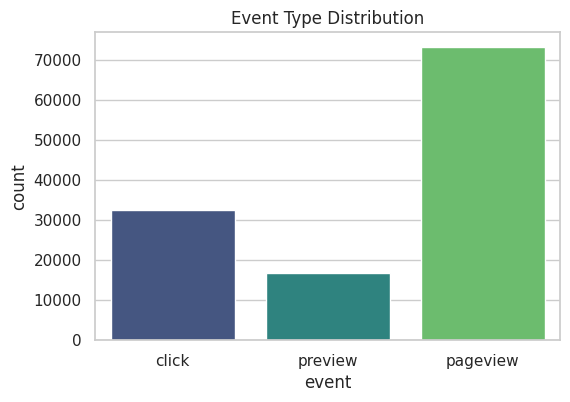

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='event', palette='viridis')
plt.title("Event Type Distribution")
plt.show()

/tmp/ipython-input-13-3455394827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


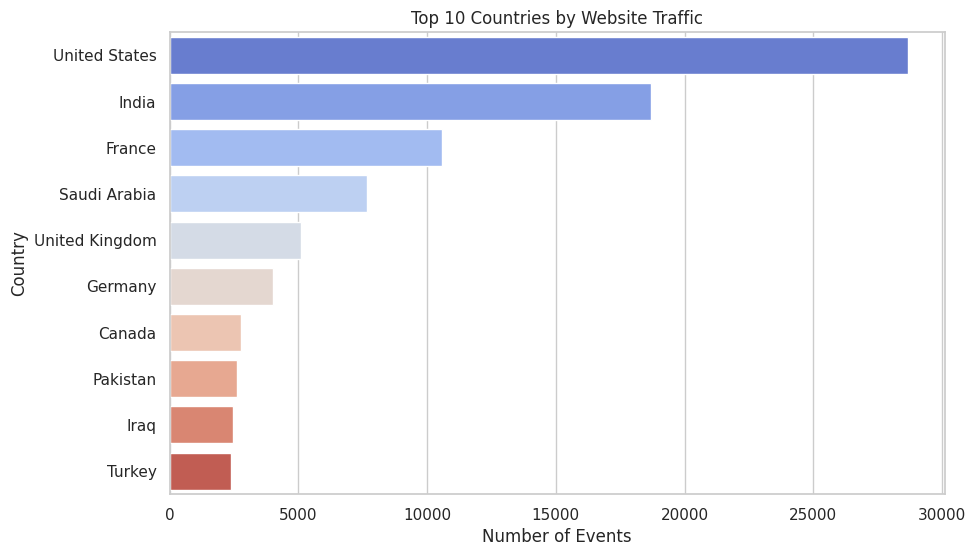

In [13]:
plt.figure(figsize=(10,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Website Traffic")
plt.xlabel("Number of Events")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-14-3989312133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


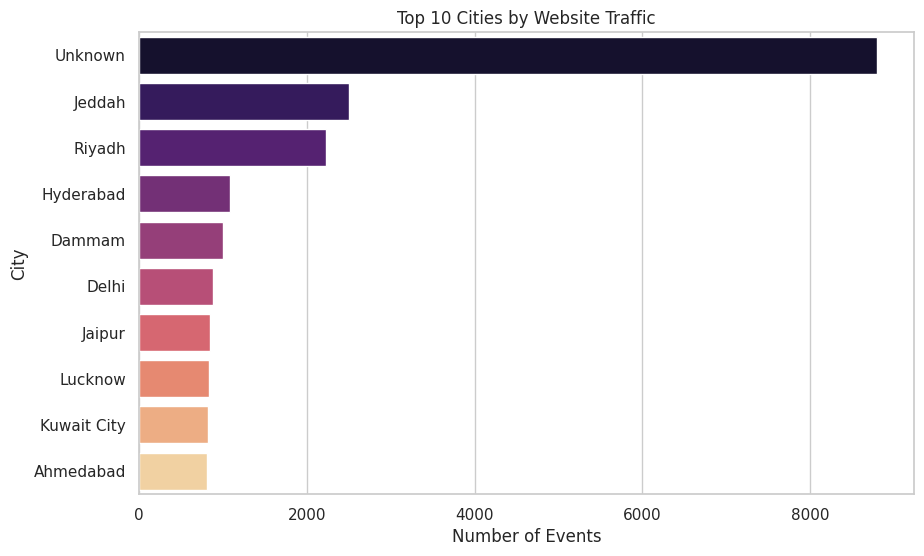

In [14]:
plt.figure(figsize=(10,6))
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title("Top 10 Cities by Website Traffic")
plt.xlabel("Number of Events")
plt.ylabel("City")
plt.show()

/tmp/ipython-input-15-3222881447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='plasma')


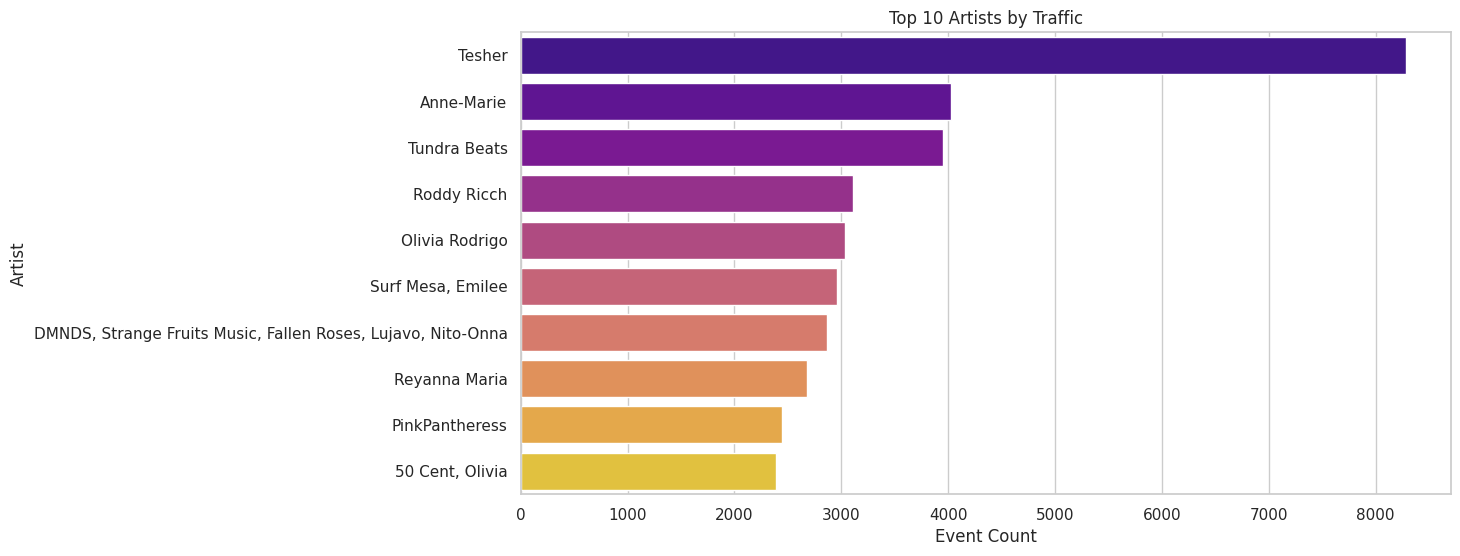

In [15]:
plt.figure(figsize=(12,6))
top_artists = df['artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='plasma')
plt.title("Top 10 Artists by Traffic")
plt.xlabel("Event Count")
plt.ylabel("Artist")
plt.show()

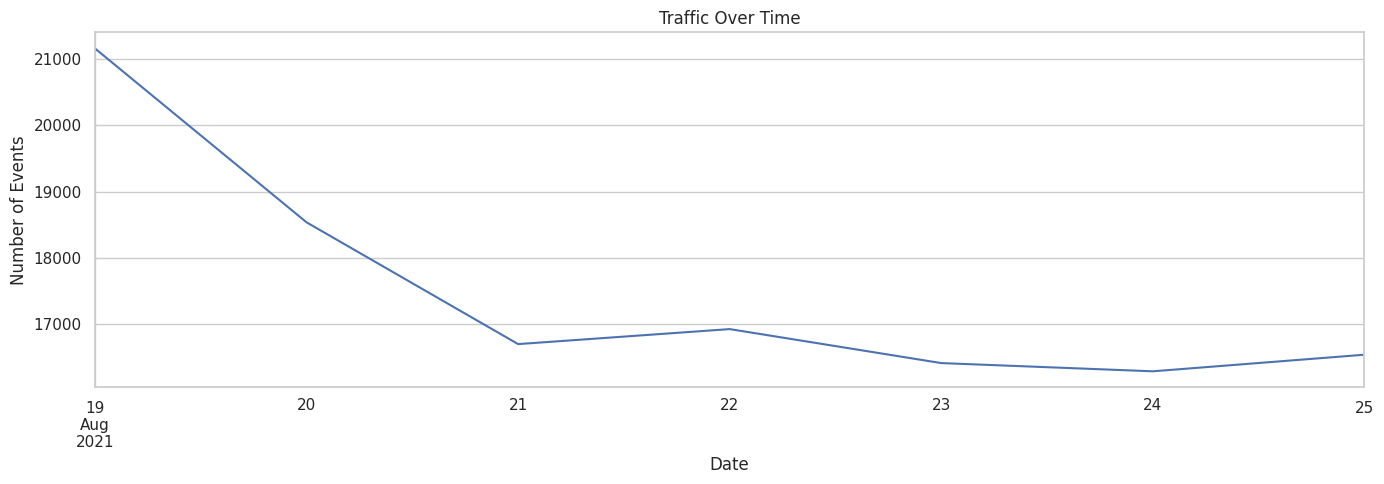

In [16]:
df_daily = df.groupby('date').size()

plt.figure(figsize=(14,5))
df_daily.plot()
plt.title("Traffic Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.grid(True)
plt.tight_layout()
plt.show()